# Neural Artistic Style Transfer

This interactive notebook shows how to use the python package `style` for performing artistic style transfer between a source and a style image. 

Based on the work of
```
Gatys, L. A., Ecker, A. S., & Bethge, M. (2015). 
A neural algorithm of artistic style. 
https://arxiv.org/abs/1508.06576
```

Also incorporating ideas from

```
Johnson, J., Alahi, A., & Fei-Fei, L. (2016, October). 
Perceptual losses for real-time style transfer and super-resolution. 
In European Conference on Computer Vision (pp. 694-711). Springer, Cham.
https://arxiv.org/abs/1603.08155
```

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import torch
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Visualizing Style Transfer

Load a source image `p` and style image `a`.

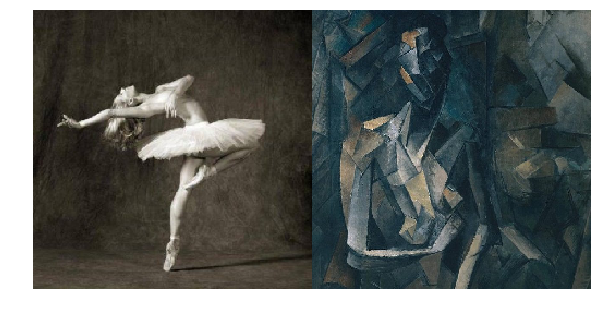

In [2]:
p = Image.open('etc/dancing.jpg').resize((256,256))
a = Image.open('etc/picasso.jpg')
a = a.resize(p.size)

plt.imshow(np.hstack((p,a)))
plt.axis('off')
plt.show()

Import `style` package

In [3]:
import style

st = style.IteratedStyleTransfer()

SyntaxError: invalid syntax (priors.py, line 18)

In [4]:
# Make sure we all see the same
torch.manual_seed(456)

# choose layers for content and style loss computation
c_id = st.conv_ids[12]

style_weights = np.zeros(len(st.conv_ids))
style_weights[[8,12]] = [0.1,0.2]

# get a generator object
g = st.iterate(p, a, c_id, style_weights, niter=500, lr=1e-2, x=p);

# and iterate (yields every 50 iterations)
fig, ax = plt.subplots()
img = ax.imshow(np.zeros((p.height, p.width, 3), dtype=np.float32))
ax.set_axis_off()

for x, l in g:
    print(l)
    clear_output(wait=True)
    img.set_data(style.to_np_image(x))
    display(fig)
clear_output(wait=True)

plt.imshow(np.hstack((p,a,style.to_pil_image(x))))
plt.axis('off')
plt.show()

NameError: name 'st' is not defined

## Multiscale

100%|███████████████████████| 100/100 [00:01<00:00, 87.24it/s, loss=[1.684e-01 3.902e-02 1.294e-01 7.029e-06], lr=0.01]


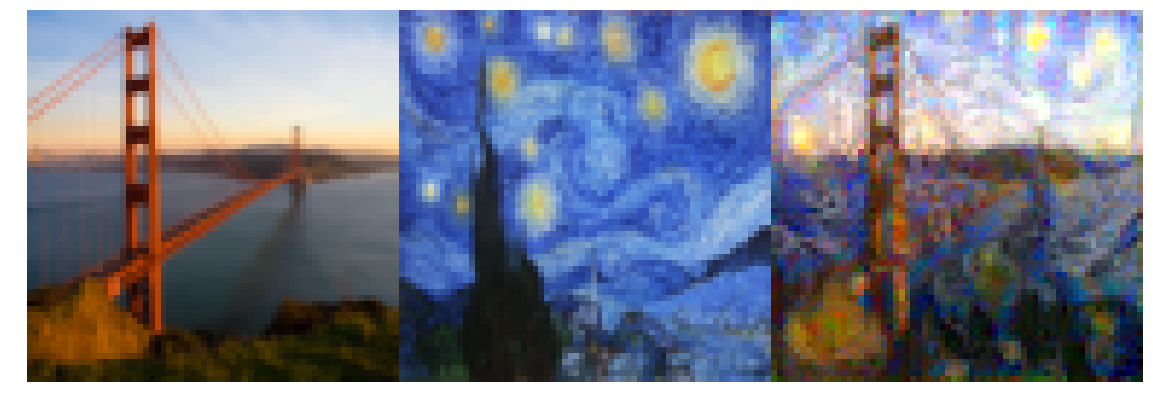

100%|███████████████████████| 100/100 [00:01<00:00, 68.99it/s, loss=[3.759e-02 2.215e-02 1.544e-02 6.232e-06], lr=0.01]


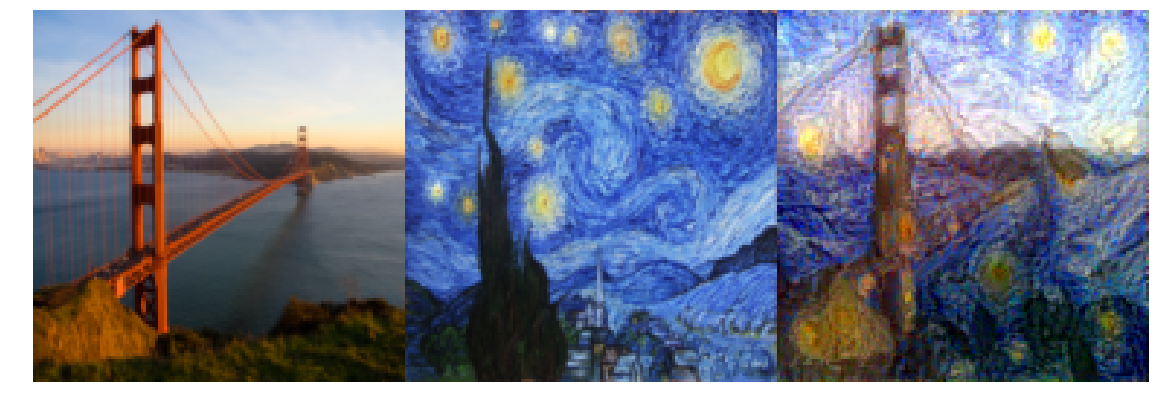

100%|███████████████████████| 100/100 [00:02<00:00, 34.92it/s, loss=[1.609e-02 1.230e-02 3.788e-03 5.995e-06], lr=0.01]


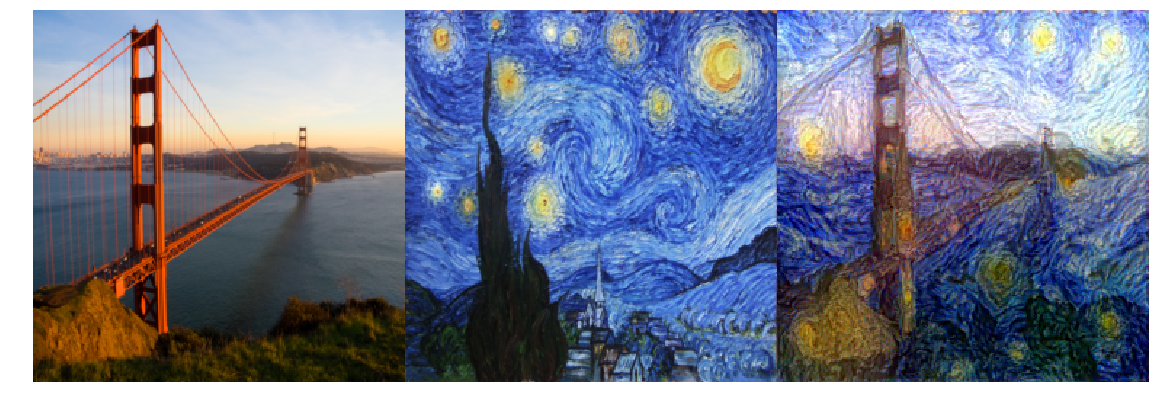

100%|███████████████████████| 100/100 [00:08<00:00, 11.74it/s, loss=[9.718e-03 8.195e-03 1.518e-03 5.463e-06], lr=0.01]


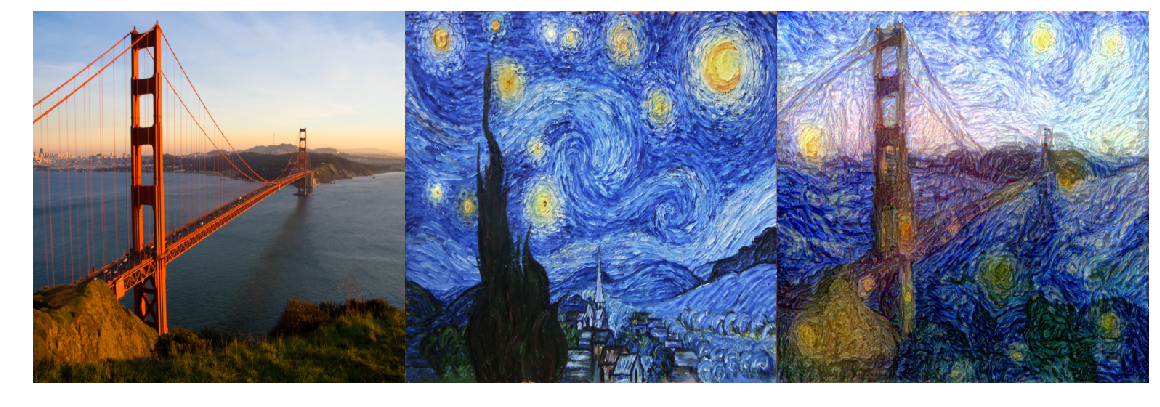

In [10]:
p = Image.open('Golden_Gate_Bridge.jpg')
a = Image.open('van_gogh-starry-night.jpg')

scales = [64,128,256,512]
c_id = st.conv_ids[8]

style_weights = np.zeros(len(st.conv_ids))
style_weights[[8,12]] = [1]

x = p
for s in scales:
    pscaled = p.resize((s, s), resample=Image.BILINEAR)
    ascaled = a.resize(pscaled.size, resample=Image.BILINEAR)
    #ascaled = a
    
    if x is not None:
        x = x.resize((s, s), resample=Image.BILINEAR)
    
    x, _ = st.run(pscaled, ascaled, c_id, style_weights, niter=100, x=x)
    x = style.to_pil_image(x)
    
    plt.figure(figsize=(20,8))
    plt.imshow(np.hstack((pscaled, a.resize(pscaled.size, resample=Image.BILINEAR), x)))
    plt.axis('off')
    plt.show()    

In [ ]:
x.save('final.png')

## Parameter Evaluation

In [ ]:
from itertools import product

content_choices = [2, 4, 8, 12]
style_choices = [[1,2,4], [4,6,8], [8,10,12]]

images = []
for c,s in product(content_choices, style_choices):
    x = run_style_transfer(vgg, dev, tnorm(p), tnorm(a), layer_ids[c], layer_ids[s], niter=2000, lr=1e-2, wc=1e-3, ws=1e4);
    images.append(tdenorm(x.squeeze().cpu()))

In [ ]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

In [ ]:
gall = gallery(np.array(images), ncols=3)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(gall)